# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Load the Data

In [ ]:
df = pd.read_csv('Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36065 entries, 0 to 36064
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   36065 non-null  int64  
 1   Accident_Index                               36065 non-null  object 
 2   Location_Easting_OSGR                        36065 non-null  float64
 3   Location_Northing_OSGR                       36065 non-null  float64
 4   Longitude                                    36065 non-null  float64
 5   Latitude                                     36065 non-null  float64
 6   Police_Force                                 36065 non-null  int64  
 7   Accident_Severity                            36065 non-null  int64  
 8   Number_of_Vehicles                           35504 non-null  float64
 9   Number_of_Casualties                         36065 non-null  int64  
 10

In [ ]:
df.sample(5)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
5012,9296,200501KF60784,540760.0,184920.0,0.028562,51.545572,1,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,E01003570,2005.0
16797,19899,200501TX20522,517170.0,177920.0,-0.313791,51.488045,1,3,2.0,2,...,3002.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002684,2005.0
8789,78134,200520D232502,413850.0,297310.0,-1.797077,52.573408,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01009450,2005.0
28284,75017,2005160C08980,493070.0,430050.0,-0.589769,53.758499,16,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,2.0,Yes,E01012969,2005.0
3382,4516,200501FH10545,525330.0,177230.0,-0.196567,51.480096,1,3,1.0,1,...,0.0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01001953,2005.0


In [ ]:
df.select_dtypes(exclude='object').describe().T
# some features needs standrization

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,36065.0,52252.788493,30293.087897,0.000000,25843.000000,52203.000000,78539.000000,104949.000000
Location_Easting_OSGR,36065.0,439721.151255,66662.919641,296780.000000,388110.000000,429360.000000,516140.000000,559570.000000
Location_Northing_OSGR,36065.0,338663.242756,115860.423810,156110.000000,193680.000000,361490.000000,415900.000000,655260.000000
Longitude,36065.0,-1.424896,0.974668,-3.596752,-2.179553,-1.554594,-0.311808,0.349947
Latitude,36065.0,52.939815,1.045994,51.289060,51.626535,53.145196,53.638319,55.790657
Police_Force,36065.0,11.080022,9.550154,1.000000,1.000000,10.000000,20.000000,48.000000
Accident_Severity,36065.0,2.848468,0.390623,1.000000,3.000000,3.000000,3.000000,3.000000
Number_of_Vehicles,35504.0,1.843736,0.711387,1.000000,1.000000,2.000000,2.000000,18.000000
Number_of_Casualties,36065.0,1.356634,0.808893,1.000000,1.000000,1.000000,1.000000,23.000000
Day_of_Week,35690.0,4.121379,1.935829,1.000000,2.000000,4.000000,6.000000,7.000000


In [ ]:
df.select_dtypes(include='object').describe().T
# As we see below most of accidents are in daylight, no serious weather conditions,

,count,unique,top,freq
Accident_Index,36065,27038,2.01E+12,9028
Date,36065,366,21/10/2005,176
Time,36064,1394,17:30,341
Local_Authority_(Highway),36064,103,E10000017,1543
Road_Type,36064,6,Single carriageway,27299
Pedestrian_Crossing-Human_Control,36060,3,None within 50 metres,35897
Pedestrian_Crossing-Physical_Facilities,36059,7,No physical crossing within 50 meters,29724
Light_Conditions,36063,5,Daylight: Street light present,26046
Weather_Conditions,36063,9,Fine without high winds,29419
Road_Surface_Conditions,36063,6,Dry,25301


In [ ]:
df.isna().sum()
# there is > 1000 null values so we keeping all columns in the main time

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,561
Number_of_Casualties,0


In [ ]:
df.duplicated().sum()
# No duplicated

0

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [ ]:
numeric_columns = ['Number_of_Vehicles', 'Day_of_Week', 'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number', 'Speed_limit', 'Urban_or_Rural_Area', 'Year']

for column in numeric_columns:
  imputer = SimpleImputer(strategy='mean')
  df[column] = imputer.fit_transform(df[[column]])

# since there is no much missing values in categorical feature I'm going to drop rows with null values
df.dropna(axis='index', inplace=True)

df.drop(['Unnamed: 0', 'Accident_Index', 'Date'], axis=1, inplace=True)

df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Day_of_Week,0
Time,0


In [ ]:
scalar = StandardScaler()

for column in df.select_dtypes(exclude='object').columns:
  df[column] = scalar.fit_transform(df[[column]])

In [ ]:
one_hot = OneHotEncoder()

for column in df.select_dtypes(include='object').columns:
  one_hot.fit(df[[column]])
  df[column] = one_hot.transform(df[[column]])

TypeError: sparse array length is ambiguous; use getnnz() or shape[0]

In [ ]:
pca = PCA(n_components=4, random_state=42)
pca.fit(df)

ValueError: could not convert string to float: '24/04/2005'

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [ ]:
# I dropped 'Location_Easting_OSGR', 'Location_Northing_OSGR' cause it is the same as longitude and latitude
# other features are not that important
X = df.drop(axis=1, labels=['Location_Easting_OSGR', 'Location_Northing_OSGR', '1st_Road_Class', '2nd_Road_Class', '1st_Road_Number', '2nd_Road_Number', 'Local_Authority_(District)', 'Local_Authority_(Highway)', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'LSOA_of_Accident_Location', 'Urban_or_Rural_Area'])
y = df.Accident_Severity

X.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.864253,-0.340288,1.035892,0.387597,0.223826,0.798129,-1.621276,16:39,Single carriageway,1.846043,Daylight: Street light present,Fine without high winds,Dry,Yes,0.0
1,-0.385985,-0.460302,0.931213,-2.170967,-1.199957,-0.445885,1.496734,14:25,Slip road,-1.332975,Daylight: Street light present,Fine without high winds,Dry,Yes,0.0
2,1.126815,-1.395744,-1.057672,0.387597,0.223826,0.798129,1.496734,10:20,Dual carriageway,-0.538220,Daylight: Street light present,Fine without high winds,Dry,Yes,0.0
3,-0.566938,-0.478478,0.931213,0.387597,0.223826,-0.445885,0.457398,21:30,Dual carriageway,0.256534,Darkness: Street lights present and lit,Fine without high winds,Dry,No,0.0
4,-0.259220,-0.151244,1.035892,0.387597,-1.199957,-0.445885,-0.581939,00:50,Dual carriageway,2.640797,Darkness: Street lights present and lit,Fine without high winds,Dry,Yes,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Latitude', ylabel='Longitude'>

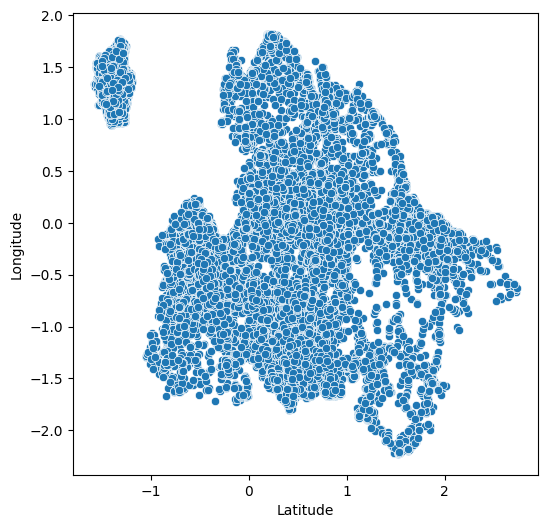

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='Latitude', y='Longitude')

# we can see that it is look like a map of a country

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [ ]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(X)

    sse.append(kmeans.Inertia_)

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

ValueError: could not convert string to float: '16:39'

In [ ]:
# Since my encoding didnt work I dont think the rest will, But I choose clusters to be 4 based on accident_severity values
k = 4
kmeans_model = KMeans(n_clusters=k, max_iter=500, random_state=42)

kmeans_model.fit(X_train)

y_pred = kmeans_model.predict(X_test)

ValueError: could not convert string to float: '20:03'

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
accuracy_score(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
confusion_matrix(y_test, y_pred)

## Plot the data points with their predicted cluster center

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?